In [1]:
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [2]:

im1 = Image.open('leather/1.png')
im2 = Image.open('leather/2.png')
im3 = Image.open('leather/3.png')
im4 = Image.open('leather/4.png')
im5 = Image.open('leather/5.png')
im6 = Image.open('leather/6.png')
im7 = Image.open('leather/7.png')
im8 = Image.open('leather/8.png')
im9 = Image.open('leather/9.png')
im10 = Image.open('leather/10.png')

pixKozhi_1 = list(im1.getdata())
pixKozhi_2 = list(im2.getdata())
pixKozhi_3 = list(im3.getdata())
pixKozhi_4 = list(im4.getdata())
pixKozhi_5 = list(im5.getdata())
pixKozhi_6 = list(im6.getdata())
pixKozhi_7 = list(im7.getdata())
pixKozhi_8 = list(im8.getdata())
pixKozhi_9 = list(im9.getdata())
pixKozhi_10 = list(im10.getdata())

pixels_ALL_Kozha = []
pixels_ALL_Kozha.extend(pixKozhi_1)
pixels_ALL_Kozha.extend(pixKozhi_2)
pixels_ALL_Kozha.extend(pixKozhi_3)
pixels_ALL_Kozha.extend(pixKozhi_4)
pixels_ALL_Kozha.extend(pixKozhi_5)
pixels_ALL_Kozha.extend(pixKozhi_6)
pixels_ALL_Kozha.extend(pixKozhi_7)
pixels_ALL_Kozha.extend(pixKozhi_8)
pixels_ALL_Kozha.extend(pixKozhi_9)
pixels_ALL_Kozha.extend(pixKozhi_10)
# print(pixels_ALL_Kozha)

In [3]:

np.reshape(pixels_ALL_Kozha,(len(pixels_ALL_Kozha), 4))
df_Kozha = pd.DataFrame(data=pixels_ALL_Kozha, columns = ['R','G','B','H'])
del df_Kozha['H']
df_Kozha['label'] = 1
# df_Kozha = df_Kozha.drop_duplicates()
print(df_Kozha)


          R    G    B  label
0       192  130  113      1
1       192  132  109      1
2       192  132  109      1
3       193  131  109      1
4       193  131  109      1
...     ...  ...  ...    ...
139577  240  224  210      1
139578  240  224  210      1
139579  247  228  219      1
139580  247  228  219      1
139581  245  226  217      1

[139582 rows x 4 columns]


In [4]:

im11 = Image.open('samples/1.png')
im12 = Image.open('samples/2.png')
im13 = Image.open('samples/3.png')
im14 = Image.open('samples/4.png')
im15 = Image.open('samples/5.png')
im16 = Image.open('samples/6.png')
im17 = Image.open('samples/7.png')
# im18 = Image.open('samples/8.png')
# im19 = Image.open('samples/9.png')
# im20 = Image.open('samples/10.png')

In [5]:

pixelsSample_1 = list(im11.getdata())
pixelsSample_2 = list(im12.getdata())
pixelsSample_3 = list(im13.getdata())
pixelsSample_4 = list(im14.getdata())
pixelsSample_5 = list(im15.getdata())
pixelsSample_6 = list(im16.getdata())
pixelsSample_7 = list(im17.getdata())
# pixelsSample_8 = list(im18.getdata())
# pixelsSample_9 = list(im19.getdata())
# pixelsSample_10 = list(im20.getdata())

pixels_NOT_Kozha = []
pixels_NOT_Kozha.extend(pixelsSample_1)
pixels_NOT_Kozha.extend(pixelsSample_2)
pixels_NOT_Kozha.extend(pixelsSample_3)
pixels_NOT_Kozha.extend(pixelsSample_4)
pixels_NOT_Kozha.extend(pixelsSample_5)
pixels_NOT_Kozha.extend(pixelsSample_6)
pixels_NOT_Kozha.extend(pixelsSample_7)
# pixels_NOT_Kozha.extend(pixelsSample_8)
# pixels_NOT_Kozha.extend(pixelsSample_9)
# pixels_NOT_Kozha.extend(pixelsSample_10)


In [6]:

np.reshape(pixels_NOT_Kozha,(len(pixels_NOT_Kozha), 4))
df_Samples = pd.DataFrame(data=pixels_NOT_Kozha, columns = ['R','G','B','H'])
del df_Samples['H']
df_Samples['label'] = 0
df_Samples = df_Samples.drop_duplicates()
print(df_Samples)


           R   G   B  label
0          0  36  94      0
101        0  35  93      0
216        0  34  92      0
224        0  35  95      0
226        0  36  96      0
...      ...  ..  ..    ...
7880004  145  37  52      0
7880006  148   0   6      0
7880010  143   7   9      0
7880012  145   0   8      0
7880076  112   2   5      0

[544286 rows x 4 columns]


In [7]:
df_Base = pd.concat([df_Kozha, df_Samples])
print(df_Base)


# columns = df_Base.columns
# print(columns)
# for column in columns:
#     print(column)
#     print(df_Base[column].value_counts(dropna=False))


           R    G    B  label
0        192  130  113      1
1        192  132  109      1
2        192  132  109      1
3        193  131  109      1
4        193  131  109      1
...      ...  ...  ...    ...
7880004  145   37   52      0
7880006  148    0    6      0
7880010  143    7    9      0
7880012  145    0    8      0
7880076  112    2    5      0

[683868 rows x 4 columns]


In [8]:

from sklearn.model_selection import train_test_split
points_train_RGB, points_test_RGB, labels_train_RGB, labels_test_RGB = train_test_split(df_Base.iloc[:, :-1], df_Base['label'], test_size=0.25, random_state=0)
print(points_train_RGB, points_test_RGB)

           R    G    B
61099    149   81   62
48619    210  245  239
41654    252  204  190
7570559    0  171  140
6367602  185   79  205
...      ...  ...  ...
4805476  119  118   64
133711   245  246  250
117952   252  217  216
5605741  187  171  155
4578215   82   57   93

[512901 rows x 3 columns]            R    G    B
6630987  229  109   23
6655730   88   84   98
6691473  215   79   41
87142    247  203  194
4811587   76   76   48
...      ...  ...  ...
91922    255  249  240
676459    10   73  129
6567149  237  130  122
6021184  240   86  216
477705   210  231  255

[170967 rows x 3 columns]


In [9]:
# классификатор Байеса
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

gnb_RGB = GaussianNB()
gnb_RGB.fit(points_train_RGB, labels_train_RGB)
prediction_RGB = gnb_RGB.predict(points_test_RGB)
# print(points_test.assign(predict=prediction))
print(format(gnb_RGB.score(points_test_RGB, labels_test_RGB)))
# print(labels_train_RGB)

0.8180818520533202


In [10]:

scores = cross_val_score(gnb_RGB, df_Base[df_Base.columns[:3]], df_Base['label'], cv=10)

print(scores, "SCORES RGB")
print(scores.mean(), "SCORES MEAN RGB")
print(scores.std(), "SCORES STD RGB")

[0.59524471 0.81774314 0.97945516 0.69636042 0.81449691 0.73840057
 0.69595098 0.84103704 0.90264089 0.91561138] SCORES RGB
0.7996941205964201 SCORES MEAN RGB
0.11207138759838993 SCORES STD RGB


In [11]:

import colorsys
HSV_Kozha = []
for i in pixels_ALL_Kozha:
    HSV_Kozha.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))
# print(HSV_ALL_Kozha)

HSV_Samples = []
for i in pixels_NOT_Kozha:
    HSV_Samples.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))
# print(HSV_Samples)


In [12]:
df_HSV_Kozha = pd.DataFrame(data=HSV_Kozha, columns=['H', 'S', 'V'])
df_HSV_Kozha['label'] = 1
df_HSV_Kozha = df_HSV_Kozha.drop_duplicates()

df_HSV_Samples = pd.DataFrame(data=HSV_Samples, columns=['H', 'S', 'V'])
df_HSV_Samples['label'] = 0
df_HSV_Samples = df_HSV_Samples.drop_duplicates()
df_BaseHSV = pd.concat([df_HSV_Kozha, df_HSV_Samples])
df_Samples = df_Samples.drop_duplicates()
# print(df_BaseHSV)
columns = df_BaseHSV.columns
print(columns)
for column in columns:
    print(column)
    print(df_BaseHSV[column].value_counts(dropna=False))


Index(['H', 'S', 'V', 'label'], dtype='object')
H
0.166667    2784
0.833333    2668
0.000000    2648
0.666667    1784
0.583333    1496
            ... 
0.317511       1
0.143777       1
0.554784       1
0.058494       1
0.142743       1
Name: H, Length: 57145, dtype: int64
S
1.000000    61475
0.500000     2052
0.666667     1361
0.333333     1356
0.400000      930
            ...  
0.016327        1
0.968379        1
0.017621        1
0.017021        1
0.020725        1
Name: S, Length: 19686, dtype: int64
V
255    23369
179     3782
239     3729
198     3692
211     3683
       ...  
4         44
3         33
2         19
1          7
0          1
Name: V, Length: 256, dtype: int64
label
0    544286
1     16012
Name: label, dtype: int64


In [13]:

points_train_HSV, points_test_HSV, labels_train_HSV, labels_test_HSV = train_test_split(df_BaseHSV.iloc[:, :-1], df_BaseHSV['label'], test_size=0.25, random_state=0)
# print(points_train_HSV, points_test_HSV)
gnb_HSV = GaussianNB()
gnb_HSV.fit(points_train_HSV, labels_train_HSV)
prediction_HSV = gnb_HSV.predict(points_test_HSV)
# print(points_test.assign(predict=prediction))
print(format(gnb_HSV.score(points_test_HSV, labels_test_HSV)))
# print(labels_train_HSV)

0.9804461895413171


In [14]:

scores_HSV = cross_val_score(gnb_HSV, df_BaseHSV[df_BaseHSV.columns[:3]], df_BaseHSV['label'], cv=10)

print(scores_HSV, "SCORES HSV")
print(scores_HSV.mean(), "SCORES MEAN HSV")
print(scores_HSV.std(), "SCORES STD HSV")

[0.98299125 0.98454399 0.98320543 0.93985365 0.97570944 0.98538283
 0.98554346 0.97390684 0.98231273 0.98359778] SCORES HSV
0.97770474015797 SCORES MEAN HSV
0.013162258876160095 SCORES STD HSV


In [15]:

imgTEST = Image.open('test.png')
width = imgTEST.size[0] 
print(width)
height = imgTEST.size[1] 
print(height)
pixelsTEST = list(imgTEST.getdata())

1000
1374


In [16]:

RGB_TEST = []
for i in pixelsTEST:
    RGB_TEST.append((i[0], i[1], i[2]))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
array = np.array(RGB_TEST).reshape(height, width, 3)
# plt.imshow(array.astype(np.uint8))

In [17]:

points_new_RGB = pd.DataFrame(data=RGB_TEST, columns=['R', 'G', 'B'])
predict_TEST_RGB = gnb_RGB.predict(points_new_RGB)
points_new_RGB = points_new_RGB.assign(label=predict_TEST_RGB)
df_TEST_NEW_RGB = pd.DataFrame(data=points_new_RGB)
# print(points_new_RGB[column].value_counts())


columns = df_TEST_NEW_RGB.columns
print(columns)
for column in columns:
    print(column)
    print(df_TEST_NEW_RGB[column].value_counts(dropna=False))

Index(['R', 'G', 'B', 'label'], dtype='object')
R
45     439411
255     70055
0       39428
1       19901
6       14937
        ...  
108       630
106       629
113       626
104       619
109       613
Name: R, Length: 256, dtype: int64
G
45     439958
0       36780
1       18894
6       17875
3       14851
        ...  
178       621
238       616
37         27
58          7
21          1
Name: G, Length: 248, dtype: int64
B
45     438277
0       56649
1       20572
5       17715
2       16256
        ...  
239       604
244       602
240       572
235       555
230       553
Name: B, Length: 256, dtype: int64
label
0    1184937
1     189063
Name: label, dtype: int64


In [18]:
RGB = []
for it, i in enumerate(RGB_TEST):
    i = list(i)
    i.append(predict_TEST_RGB[it])
    RGB.append(i)
RGB_2 = []
for it, i in enumerate(RGB):
    if (predict_TEST_RGB[it]==1):
        i[0] = 255
        i[1] = 0
        i[2] = 0
    RGB_2.append((i[0], i[1], i[2]))

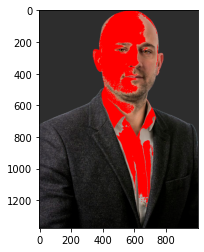

In [19]:
array = np.array(RGB_2).reshape(height, width, 3)
plt.imshow(array.astype(np.uint8))

In [20]:

HSV_TEST = []
for i in pixelsTEST:
        HSV_TEST.append(colorsys.rgb_to_hsv(i[0], i[1], i[2]))

In [21]:
# np.reshape(HSV_TEST,(len(HSV_TEST), 4))
points_new = pd.DataFrame(data=HSV_TEST, columns=['H', 'S', 'V'])
# del points_new['Z']
predidict_TEST = gnb_HSV.predict(points_new)
points_new = points_new.assign(label=predidict_TEST)
df_TEST_NEW = pd.DataFrame(data=points_new)

In [22]:
columns = df_TEST_NEW.columns
print(columns)
for column in columns:
    print(column)
    print(df_TEST_NEW[column].value_counts(dropna=False))

Index(['H', 'S', 'V', 'label'], dtype='object')
H
0.000000    571150
0.166667    191734
0.222222     40478
0.666667     30436
0.194444     27923
             ...  
0.016493         1
0.994302         1
0.040441         1
0.021583         1
0.995671         1
Name: H, Length: 3228, dtype: int64
S
0.000000    567385
0.333333     25782
1.000000     20087
0.500000     17703
0.100000     13170
             ...  
0.192708         1
0.075397         1
0.171296         1
0.197581         1
0.684524         1
Name: S, Length: 13313, dtype: int64
V
45     438405
255     72080
0       36606
1       18708
6       17201
        ...  
113       648
109       648
106       642
104       641
8         425
Name: V, Length: 256, dtype: int64
label
0    1252675
1     121325
Name: label, dtype: int64


In [23]:
HSV_2 =[]
for it, i in enumerate(HSV_TEST):
    i = list(i)
    i.append(predidict_TEST[it])
    HSV_2.append(i)
RGB_3 = []
for it, i in enumerate(HSV_2):
    if (predidict_TEST[it]==1):
        i[0] = 0
        i[1] = 1
        i[2] = 100
    RGB_3.append(colorsys.hsv_to_rgb(i[0], i[1], i[2]))

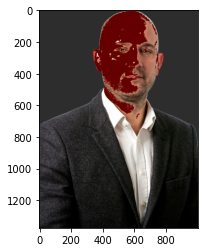

In [24]:
array = np.array(RGB_3).reshape(height, width, 3)
plt.imshow(array.astype(np.uint8))